# How do these courses relate?

In [39]:
from pyvis.network import Network
import pandas as pd
import networkx as nx

# Load your data
workshop_data = pd.read_csv('data/admin/workshop_details.csv')

# Create a directed graph
G = nx.DiGraph()

# Determine unique pathways and assign colors
pathways = workshop_data['pathways'].dropna().unique()
colors = ['#FFD700', '#FF6347', '#4682B4', '#32CD32', '#FFA500', '#6A5ACD', '#FF4500', '#2E8B57']  # Example colors
color_map = {pathway: colors[i % len(colors)] for i, pathway in enumerate(pathways)}

# Add nodes and edges
for index, row in workshop_data.iterrows():
    pathway = row['pathways'] if pd.notna(row['pathways']) else 'None'
    node_color = color_map.get(pathway, '#D3D3D3')  # Default gray if no pathway or not found
    G.add_node(row['workshop_name'], title=row['workshop_name'], group=pathway, color=node_color)
    if pd.notna(row['pre_reqs']):
        prerequisites = [pr.strip() for pr in row['pre_reqs'].split(',')]
        for pre_req in prerequisites:
            if pre_req in G.nodes():  # Ensure the prerequisite exists as a node before adding an edge
                G.add_edge(pre_req, row['workshop_name'])

# Initialize PyVis network with remote CDN resources
nt = Network("750px", "750px", notebook=True, cdn_resources='remote')
nt.from_nx(G)

# Add a legend manually through HTML (since Pyvis does not support built-in legends)
legend_html = "<div style='position:absolute; top:10px; right:10px; width:150px; height:120px; background-color: white; border:1px solid black; z-index:9999; font-size:10px;'>"
legend_html += "<b>Legend:</b><br>"
for pathway, color in color_map.items():
    legend_html += f"<div style='margin-top:5px;'><span style='display:inline-block; width:12px; height:12px; background-color:{color};'>&nbsp;</span> {pathway}</div>"
legend_html += "</div>"

nt.html += legend_html  # Append the legend HTML to the network

# Display the network
nt.show("workshops_network.html")


workshops_network.html


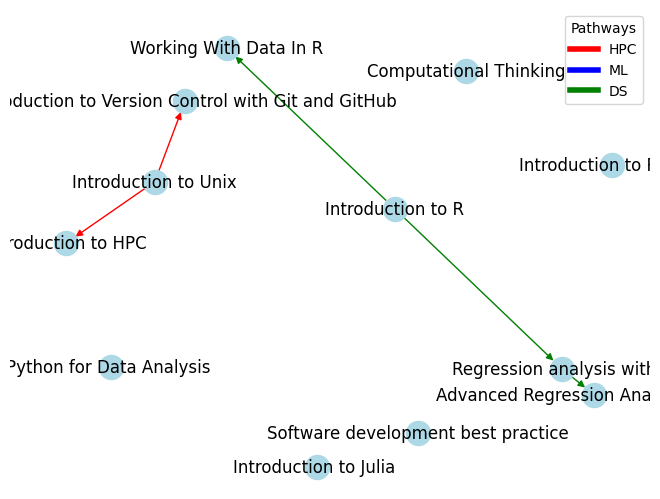

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df = pd.read_csv('data/admin/workshop_details.csv')

# Create a directed graph
G = nx.DiGraph()

# Add nodes with the workshop name as the node label
for index, row in df.iterrows():
    G.add_node(row['workshop_name'], pathways=row['pathways'])

# Add edges based on prerequisites
for index, row in df.iterrows():
    if pd.notna(row['pre_reqs']):
        prereqs = row['pre_reqs'].split(',')
        for prereq in prereqs:
            prereq = prereq.strip()  # Clean up extra spaces
            if prereq in df['workshop_name'].values:
                G.add_edge(prereq, row['workshop_name'])

# Define colors for each pathway
pathways = {'HPC': 'red', 'ML': 'blue', 'DS': 'green'}
edge_colors = []
for edge in G.edges():
    src, dest = edge
    pathways_list = G.nodes[dest]['pathways'].split(',')
    edge_color = pathways.get(pathways_list[0].strip(), 'black')  # default color if not found
    edge_colors.append(edge_color)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=edge_colors, arrows=True)

# Create a legend for the colors
legend_labels = {pathway: plt.Line2D([0], [0], color=color, lw=4) for pathway, color in pathways.items()}
plt.legend(legend_labels.values(), legend_labels.keys(), title="Pathways")

# Show the graph
plt.show()
